In [54]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Disabling python warnings
import warnings
warnings.filterwarnings("ignore")

In [55]:
# pulling data
data = pd.read_csv("C:/Users/Utku/Desktop/Jupyter Notebook/Datathon/03.02.2022 Data Science with Python/olympics_dataset.csv")
data.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [57]:
data.columns

Index(['ID', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [58]:
# Changing the columns name
data.rename(columns = {"ID"     : 'id',
                       "Name"   : 'name',
                       "Gender" : 'gender',
                       "Age"    : 'age',
                       "Height" : 'height',
                       "Weight" : 'weight',
                       "Team"   : 'team',
                       "NOC"    : 'noc',
                       "Games"  : 'games',
                       "Year"   : 'year',
                       "Season" : 'season',
                       "City"   : 'city',
                       "Sport"  : 'sport',
                       "Event"  : 'event',
                       "Medal"  : 'medal'}, inplace = True)

data.head(2)

,id,name,gender,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [59]:
# Dropping unnecessary columns
data = data.drop(["id", "games"], axis = 1) # axis = 1 means column

data.head(2)

,name,gender,age,height,weight,team,noc,year,season,city,sport,event,medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [60]:
unique_event = pd.unique(data.event)
print(f"Number of the Unique Events: {len(unique_event)}")
unique_event[:10]

Number of the Unique Events: 765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [61]:
# looping each event iteratively
# Calculating the means height and weight for the event
# Equating the lost height and weight means to the event means for the event

temporary_data = data.copy() # made a copy to avoid corrupting the real data
height_weight_list = ["height", "weight"]

for e in unique_event:
    
    # event filter
    event_filter = temporary_data.event == e
    # filtering the data for event
    data_filtered = temporary_data[event_filter]
    
    # calculating means of height and weight for event
    
    for s in height_weight_list:
        mean = np.round(np.mean(data_filtered[s]), 2)
        
        if ~np.isnan(mean): # if there is a mean for the event
            data_filtered[s] = data_filtered[s].fillna(mean)
            
        else: # if there is a mean, calculate the mean
            all_data_mean = np.round(np.mean(data[s]), 2)
            data_filtered[s] = data_filtered[s].fillna(all_data_mean)
    
    # syncing the data with missing values filled in the activity to temporary_data
    temporary_data[event_filter] = data_filtered
    
# syncing the data with missing values filled to real data
data = temporary_data.copy()
data.info() # looking at the number of missing values in the height and weight columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   name    271116 non-null  object 
 1   gender  271116 non-null  object 
 2   age     261642 non-null  float64
 3   height  271116 non-null  float64
 4   weight  271116 non-null  float64
 5   team    271116 non-null  object 
 6   noc     271116 non-null  object 
 7   year    271116 non-null  int64  
 8   season  271116 non-null  object 
 9   city    271116 non-null  object 
 10  sport   271116 non-null  object 
 11  event   271116 non-null  object 
 12  medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [62]:
# Finding missing values on age variable
# Detecting values defined in age variable

age_mean = np.round(np.mean(data.age), 2)
print(f"The average age: {age_mean}")

data["age"] = data["age"].fillna(age_mean)

data.info()

The average age: 25.56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   name    271116 non-null  object 
 1   gender  271116 non-null  object 
 2   age     271116 non-null  float64
 3   height  271116 non-null  float64
 4   weight  271116 non-null  float64
 5   team    271116 non-null  object 
 6   noc     271116 non-null  object 
 7   year    271116 non-null  int64  
 8   season  271116 non-null  object 
 9   city    271116 non-null  object 
 10  sport   271116 non-null  object 
 11  event   271116 non-null  object 
 12  medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


### Extracting the non-medalist atheletes from the dataset

In [63]:
medal_variable = data["medal"]
pd.isnull(medal_variable).sum()

231333

In [64]:
medal_variable_filter = ~pd.isnull(medal_variable)

In [65]:
data = data[medal_variable_filter]
data.head(5)

,name,gender,age,height,weight,team,noc,year,season,city,sport,event,medal
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    39783 non-null  object 
 1   gender  39783 non-null  object 
 2   age     39783 non-null  float64
 3   height  39783 non-null  float64
 4   weight  39783 non-null  float64
 5   team    39783 non-null  object 
 6   noc     39783 non-null  object 
 7   year    39783 non-null  int64  
 8   season  39783 non-null  object 
 9   city    39783 non-null  object 
 10  sport   39783 non-null  object 
 11  event   39783 non-null  object 
 12  medal   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [67]:
# Saving the dataset for later use
data.to_csv("Cleared_olypmics_dataset.csv", index = False)

In [68]:
# Drawing the histogram graphs

def plotHistogram(variable):
    """
    Input : Variable / Column Name
    Output: Histogram of variable
    """
    plt.figure()
    plt.hist(data[variable], bins = 80, color = "blue")
    plt.xlabel(variable, color = "green")
    plt.ylabel("Frequency", color = "green")
    plt.title(f"Data Frequency - {variable}", color = "green")
    plt.show()

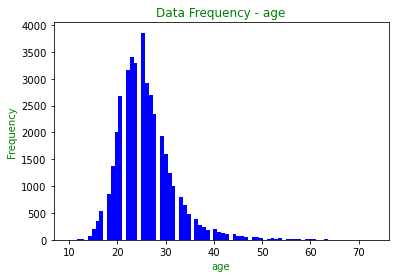

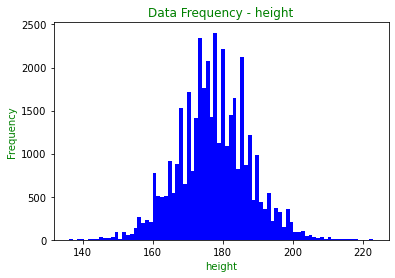

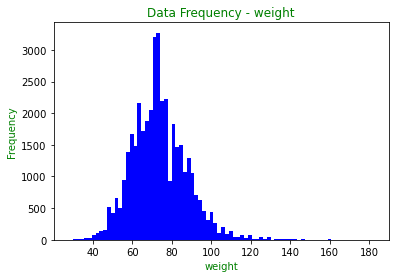

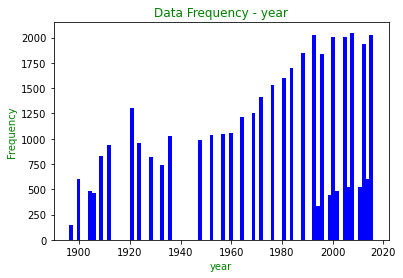

In [69]:
# histogram for all numerical variables

numeric_variable = ["age", "height", "weight", "year"]

for i in numeric_variable:
    plotHistogram(i)

In [70]:
data.describe()

,age,height,weight,year
count,39783.000000,39783.000000,39783.000000,39783.000000
mean,25.918456,177.336690,73.738320,1973.943845
std,5.859569,10.170124,13.979041,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.480000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000


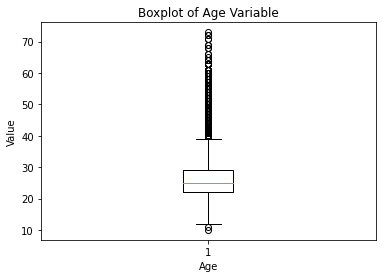

In [71]:
plt.boxplot(data.age)
plt.title("Boxplot of Age Variable")
plt.xlabel("Age")
plt.ylabel("Value")
plt.show()

In [72]:
# writing a method for draw bar graph
def plotBar(variable, n = 5):
    """
    Input  : Variable / Column Name
             n = Number of unique value to show
    Output : Bar Graph
    """
    data_ = data[variable]
    data_count = data_.value_counts()
    data_count = data_count[:n]
    plt.figure()
    plt.bar(data_count.index, data_count, color = "blue")
    plt.xticks(data_count.index, data_count.index.values)
    plt.xticks(rotation = 90)
    plt.ylabel("Frequency")
    plt.title(f"Data Frequency - {variable}")
    plt.show()
    print(f"{variable}: \n{data_count}")

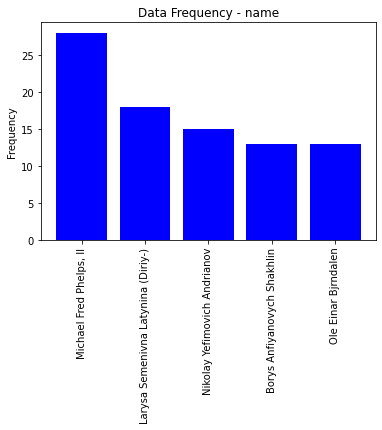

name: 
Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Borys Anfiyanovych Shakhlin           13
Ole Einar Bjrndalen                   13
Name: name, dtype: int64


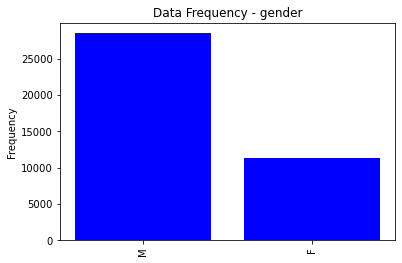

gender: 
M    28530
F    11253
Name: gender, dtype: int64


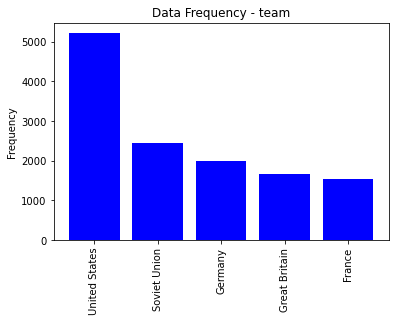

team: 
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: team, dtype: int64


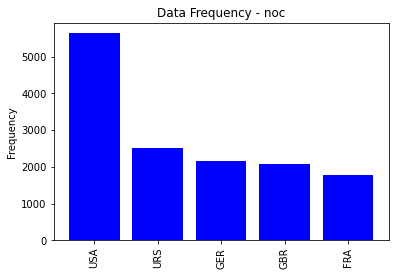

noc: 
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: noc, dtype: int64


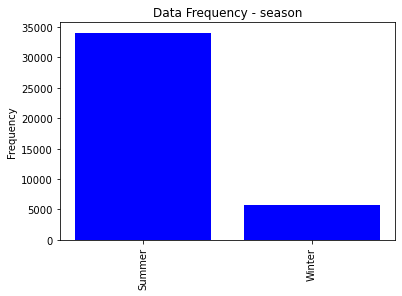

season: 
Summer    34088
Winter     5695
Name: season, dtype: int64


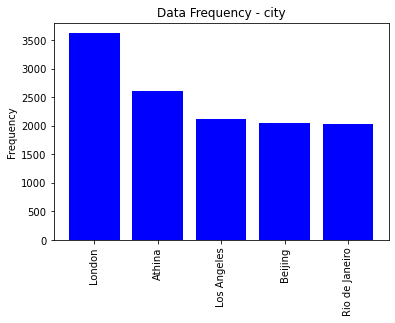

city: 
London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: city, dtype: int64


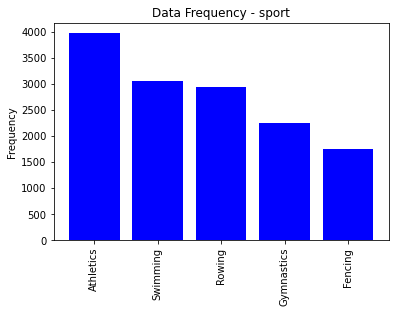

sport: 
Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: sport, dtype: int64


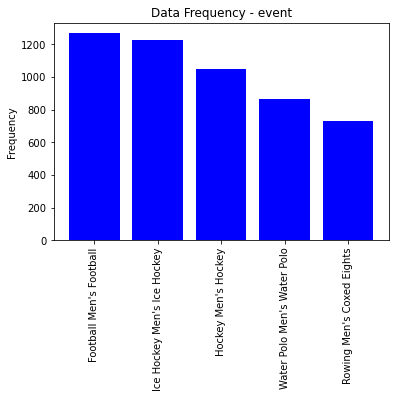

event: 
Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: event, dtype: int64


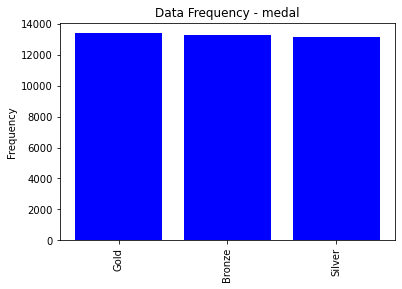

medal: 
Gold      13372
Bronze    13295
Silver    13116
Name: medal, dtype: int64


In [73]:
categorical_variable = ["name", "gender", "team", "noc", "season", "city", "sport", "event", "medal"]

for i in categorical_variable:
    plotBar(i)

In [74]:
male = data[data.gender == "M"]
male.head(3)

,name,gender,age,height,weight,team,noc,year,season,city,sport,event,medal
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [75]:
female = data[data.gender == "F"]
female.head(3)

,name,gender,age,height,weight,team,noc,year,season,city,sport,event,medal
79,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze


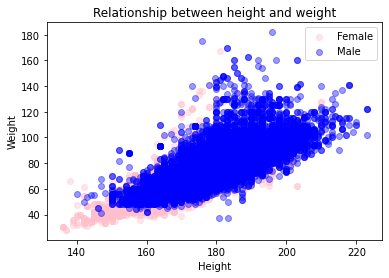

In [76]:
plt.figure()
plt.scatter(female.height, female.weight, alpha = 0.4, label = "Female", color = "pink")
plt.scatter(male.height, male.weight, alpha = 0.4, label = "Male", color = "blue")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Relationship between height and weight")
plt.legend()
plt.show()

In [77]:
data.loc[:, ["age", "height", "weight"]].corr() # correlation table

,age,height,weight
age,1.000000,0.061890,0.136349
height,0.061890,1.000000,0.794368
weight,0.136349,0.794368,1.000000


In [78]:
# filtering the atheletes based on the medals they got
data_temporary = data.copy()
data_temporary = pd.get_dummies(data_temporary, columns = ['medal'])
data_temporary.head(2)

,name,gender,age,height,weight,team,noc,year,season,city,sport,event,medal_Bronze,medal_Gold,medal_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0


In [79]:
data_temporary.loc[:, ["age", "medal_Bronze", "medal_Gold", "medal_Silver"]].corr()

,age,medal_Bronze,medal_Gold,medal_Silver
age,1.000000,-0.005584,-0.002576,0.008192
medal_Bronze,-0.005584,1.000000,-0.504110,-0.496859
medal_Gold,-0.002576,-0.504110,1.000000,-0.499022
medal_Silver,0.008192,-0.496859,-0.499022,1.000000


In [80]:
data_temporary.loc[:, ["team", "medal_Bronze", "medal_Gold", "medal_Silver"]].groupby(["team"], as_index = False).sum().sort_values(by = "medal_Gold", ascending = False)[:10]

,team,medal_Bronze,medal_Gold,medal_Silver
462,United States,1233.0,2474.0,1512.0
403,Soviet Union,677.0,1058.0,716.0
165,Germany,678.0,679.0,627.0
215,Italy,484.0,535.0,508.0
171,Great Britain,572.0,519.0,582.0
149,France,577.0,455.0,518.0
420,Sweden,507.0,451.0,476.0
198,Hungary,365.0,432.0,330.0
67,Canada,408.0,422.0,413.0
117,East Germany,263.0,369.0,309.0


In [81]:
data_temporary.loc[:, ["city", "medal_Bronze", "medal_Gold", "medal_Silver"]].groupby(["city"], as_index = False).sum().sort_values(by = "medal_Gold", ascending = False)[:10]

,city,medal_Bronze,medal_Gold,medal_Silver
17,London,1214.0,1215.0,1195.0
3,Athina,860.0,883.0,859.0
18,Los Angeles,706.0,726.0,691.0
6,Beijing,710.0,671.0,667.0
27,Rio de Janeiro,703.0,665.0,655.0
38,Sydney,680.0,663.0,661.0
4,Atlanta,629.0,608.0,605.0
5,Barcelona,604.0,559.0,549.0
33,Seoul,549.0,520.0,513.0
2,Antwerpen,367.0,493.0,448.0


In [82]:
data_temporary.loc[:, ["gender", "medal_Bronze", "medal_Gold", "medal_Silver"]].groupby(["gender"], as_index = False).sum().sort_values(by = "medal_Gold", ascending = False)[:10]

,gender,medal_Bronze,medal_Gold,medal_Silver
1,M,9524.0,9625.0,9381.0
0,F,3771.0,3747.0,3735.0


In [83]:
data_pivot = data.pivot_table(index = "medal", columns = "gender",
                              values = ["height", "weight", "age"],
                              aggfunc = {"height": np.mean, "weight": np.mean, "age": [min, max, np.std]})
data_pivot.head()

age                                            height              \
         max         min             std                  mean               
gender     F     M     F     M         F         M           F           M   
medal                                                                        
Bronze  69.0  72.0  12.0  10.0  5.329229  5.870340  170.003227  180.045806   
Gold    63.0  64.0  13.0  13.0  5.219615  5.987807  170.448727  180.318906   
Silver  55.0  73.0  11.0  13.0  5.253111  6.098221  170.233783  180.053626   

           weight             
             mean             
gender          F          M  
medal                         
Bronze  62.757125  77.841504  
Gold    63.199349  78.186505  
Silver  62.866892  77.960887

In [84]:
def anomalyDetection(df, char):
    outlier_indices = []
    
    for c in char:
        # first quarter
        Q1 = np.percentile(df[c], 25)
        # third quarter
        Q3 = np.percentile(df[c], 75)
        # IQR = Inter Quartile Range
        IQR = Q3 - Q1
        # the additional amount needed to be an outlier
        outlier_step = 1.5 * IQR
        # outlier and it's index
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 - outlier_step)].index
        # store the indexes of outliers
        outlier_indices.extend(outlier_list_col)
    
    # finding the unique outliers
    outlier_indices = Counter(outlier_indices)
    # if an example has a different value in x column(s), take it as an outlier
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)
    
    return multiple_outliers

In [85]:
data_anomaly = data.loc[anomalyDetection(data, ["age", "weight", "height"])]
data_anomaly.sport.value_counts()

Athletics        3805
Swimming         2962
Rowing           2851
Fencing          1719
Gymnastics       1605
                 ... 
Motorboating        7
Roque               3
Jeu De Paume        3
Basque Pelota       2
Aeronautics         1
Name: sport, Length: 66, dtype: int64

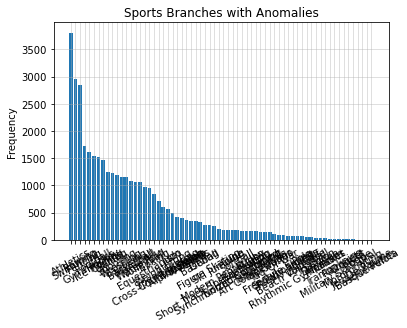

In [86]:
plt.figure()
plt.bar(data_anomaly.sport.value_counts().index, data_anomaly.sport.value_counts().values)
plt.xticks(rotation = 30)
plt.title("Sports Branches with Anomalies")
plt.ylabel("Frequency")
plt.grid(True, alpha = 0.5)
plt.show()

In [87]:
data_gym = data_anomaly[data_anomaly.sport == "Gymnastics"]
data_gym

,name,gender,age,height,weight,team,noc,year,season,city,sport,event,medal
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
50,Paavo Johannes Aaltonen,M,32.0,175.00,64.00,Finland,FIN,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237773,Einari Allan Tersvirta,M,17.0,167.75,63.46,Finland,FIN,1932,Summer,Los Angeles,Gymnastics,Gymnastics Men's Horizontal Bar,Bronze
256864,Wang Yan,F,16.0,140.00,33.00,China,CHN,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Women's Team All-Around,Bronze
262490,Merrill Rowland Wolfe,M,17.0,175.34,70.70,United States,USA,1932,Summer,Los Angeles,Gymnastics,Gymnastics Men's Tumbling,Gold
263856,Xing Aowei,M,18.0,171.00,64.00,China,CHN,2000,Summer,Sydney,Gymnastics,Gymnastics Men's Team All-Around,Gold


In [88]:
data_gym.event.value_counts()

Gymnastics Men's Team All-Around                          676
Gymnastics Men's Team All-Around, Swedish System          147
Gymnastics Men's Team All-Around, Free System             109
Gymnastics Men's Individual All-Around                     76
Gymnastics Men's Horizontal Bar                            73
Gymnastics Men's Rings                                     72
Gymnastics Men's Horse Vault                               71
Gymnastics Men's Parallel Bars                             70
Gymnastics Men's Pommelled Horse                           65
Gymnastics Women's Team All-Around                         63
Gymnastics Men's Floor Exercise                            55
Gymnastics Men's Rope Climbing                             16
Gymnastics Women's Uneven Bars                             14
Gymnastics Men's Parallel Bars, Teams                      12
Gymnastics Women's Balance Beam                            12
Gymnastics Women's Horse Vault                             10
Gymnasti

In [89]:
data_basketball = data_anomaly[data_anomaly.sport == "Basketball"]
data_basketball

,name,gender,age,height,weight,team,noc,year,season,city,sport,event,medal
609,Julius Shareef Abdur-Rahim,M,23.0,202.00,104.00,United States,USA,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1029,"Alejandro ""lex"" Abrines Redondo",M,23.0,198.00,93.00,Spain,ESP,2016,Summer,Rio de Janeiro,Basketball,Basketball Men's Basketball,Bronze
1035,Svetlana Olegovna Abrosimova,F,28.0,188.00,77.00,Russia,RUS,2008,Summer,Beijing,Basketball,Basketball Women's Basketball,Bronze
1293,Martn Ral Acosta y Lara Daz,M,27.0,194.87,91.68,Uruguay,URU,1952,Summer,Helsinki,Basketball,Basketball Men's Basketball,Bronze
1807,Dainius Adomaitis,M,26.0,202.00,100.00,Lithuania,LTU,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
216548,Seong Jeong-A,F,18.0,184.00,70.00,South Korea,KOR,1984,Summer,Los Angeles,Basketball,Basketball Women's Basketball,Silver
222780,Evladiya Slavcheva-Stefanova (-Zakatanova),F,18.0,182.00,75.00,Bulgaria,BUL,1980,Summer,Moskva,Basketball,Basketball Women's Basketball,Silver
240656,Volodymyr Petrovych Tkachenko,M,18.0,220.00,110.00,Soviet Union,URS,1976,Summer,Montreal,Basketball,Basketball Men's Basketball,Bronze
247504,Maigonis Valdmanis,M,18.0,180.00,75.00,Soviet Union,URS,1952,Summer,Helsinki,Basketball,Basketball Men's Basketball,Silver


In [90]:
data_basketball.event.value_counts()

Basketball Men's Basketball      687
Basketball Women's Basketball    390
Name: event, dtype: int64

In [91]:
data_time = data.copy()
data_time.head(3)

,name,gender,age,height,weight,team,noc,year,season,city,sport,event,medal
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [92]:
unique_years = data_time.year.unique()
unique_years

array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896], dtype=int64)

In [93]:
# sorting the years
ordered_array = np.sort(data_time.year.unique())
ordered_array

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

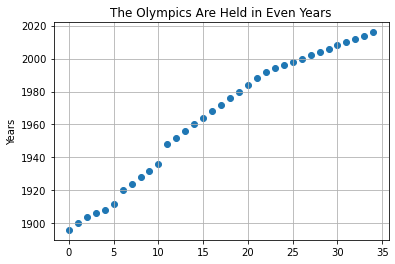

In [94]:
plt.figure()
plt.scatter(range(len(ordered_array)), ordered_array)
plt.grid(True)
plt.ylabel("Years")
plt.title("The Olympics Are Held in Even Years")
plt.show()

In [95]:
# Converting the year values in the dataset to the "datetime" data type
date_time_object = pd.to_datetime(data_time["year"], format = '%Y')
print(type(date_time_object))
date_time_object.head(3)

<class 'pandas.core.series.Series'>


3    1900-01-01
37   1920-01-01
38   1920-01-01
Name: year, dtype: datetime64[ns]

In [96]:
data_time["date_time"] = date_time_object
data_time.head(3)

,name,gender,age,height,weight,team,noc,year,season,city,sport,event,medal,date_time
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01


In [97]:
data_time = data_time.set_index("date_time")
data_time.drop(["year"], axis = 1, inplace = True)
data_time.head(3)

,name,gender,age,height,weight,team,noc,season,city,sport,event,medal
date_time,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [98]:
periodic_data = data_time.resample("2A").mean()
periodic_data.head()

,age,height,weight
date_time,,,
1896-12-31,23.905734,174.280350,72.734056
1898-12-31,NaN,NaN,NaN
1900-12-31,27.786689,177.882301,74.979950
1902-12-31,NaN,NaN,NaN
1904-12-31,26.363868,177.241091,74.330823


In [99]:
periodic_data.dropna(axis = 0, inplace = True)
periodic_data.head()

,age,height,weight
date_time,,,
1896-12-31,23.905734,174.280350,72.734056
1900-12-31,27.786689,177.882301,74.979950
1904-12-31,26.363868,177.241091,74.330823
1906-12-31,26.479389,176.347576,74.072183
1908-12-31,27.566739,176.662419,73.721107


<Figure size 432x288 with 0 Axes>

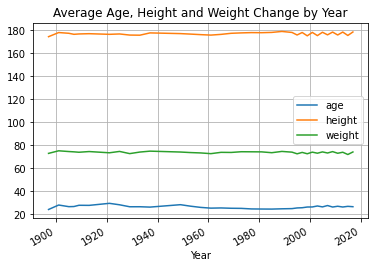

In [100]:
plt.figure()
periodic_data.plot()
plt.title("Average Age, Height and Weight Change by Year")
plt.xlabel("Year")
plt.grid(True)
plt.show()

In [101]:
data_time = pd.get_dummies(data_time, columns = ['medal'])
data_time.head(3)

,name,gender,age,height,weight,team,noc,season,city,sport,event,medal_Bronze,medal_Gold,medal_Silver
date_time,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0


In [102]:
periodic_data = data_time.resample("2A").sum()
periodic_data.head()

# extracting the missing data
periodic_data = periodic_data[~(periodic_data == 0).any(axis = 1)]
periodic_data.tail()

,age,height,weight,medal_Bronze,medal_Gold,medal_Silver
date_time,,,,,,
2008-12-31,53344.0,365157.91,152090.92,710.0,671.0,667.0
2010-12-31,13896.0,91395.00,37877.12,171.0,174.0,175.0
2012-12-31,50595.0,346091.47,143102.94,679.0,632.0,630.0
2014-12-31,15907.0,104686.00,42838.63,198.0,202.0,197.0
2016-12-31,53256.0,360846.03,149628.71,703.0,665.0,655.0


<Figure size 432x288 with 0 Axes>

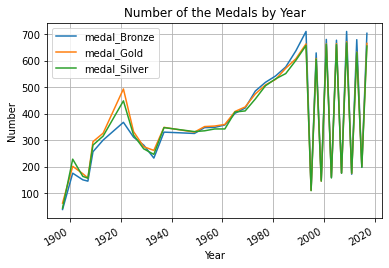

In [103]:
plt.figure()
periodic_data.loc[:, ["medal_Bronze", "medal_Gold", "medal_Silver"]].plot()
plt.title("Number of the Medals by Year")
plt.ylabel("Number")
plt.xlabel("Year")
plt.grid(True)
plt.show()

In [105]:
summer = data_time[data_time.season == "Summer"]
winter = data_time[data_time.season == "Winter"]
winter.head(3)

,name,gender,age,height,weight,team,noc,season,city,sport,event,medal_Bronze,medal_Gold,medal_Silver
date_time,,,,,,,,,,,,,,
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,0,1,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,1,0,0


In [108]:
periodic_data_winter = winter.resample("A").sum()
periodic_data_winter = periodic_data_winter[~(periodic_data_winter == 0).any(axis = 1)]
periodic_data_winter.head()

,age,height,weight,medal_Bronze,medal_Gold,medal_Silver
date_time,,,,,,
1924-12-31,3919.60,22867.28,9703.58,37,55,38
1928-12-31,2265.56,15745.75,6862.50,31,30,28
1932-12-31,2431.00,16357.71,7067.76,28,32,32
1936-12-31,2742.00,19123.20,8101.88,35,36,37
1948-12-31,3643.00,23942.51,10375.92,46,41,48


In [109]:
periodic_data_summer = summer.resample("A").sum()
periodic_data_summer = periodic_data_summer[~(periodic_data_summer == 0).any(axis = 1)]
periodic_data_summer.head()

,age,height,weight,medal_Bronze,medal_Gold,medal_Silver
date_time,,,,,,
1896-12-31,3418.52,24922.09,10400.97,38.0,62.0,43.0
1900-12-31,16783.16,107440.91,45287.89,175.0,201.0,228.0
1904-12-31,12812.84,86139.17,36124.78,150.0,173.0,163.0
1906-12-31,12127.56,80767.19,33925.06,145.0,157.0,156.0
1908-12-31,22907.96,146806.47,61262.24,256.0,294.0,281.0


<Figure size 432x288 with 0 Axes>

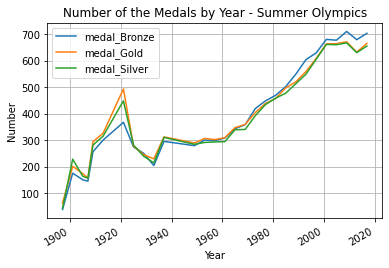

In [110]:
plt.figure()
periodic_data_summer.loc[:, ["medal_Bronze", "medal_Gold", "medal_Silver"]].plot()
plt.title("Number of the Medals by Year - Summer Olympics")
plt.ylabel("Number")
plt.xlabel("Year")
plt.grid(True)
plt.show()

<Figure size 432x288 with 0 Axes>

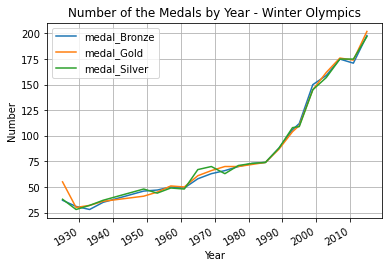

In [111]:
plt.figure()
periodic_data_winter.loc[:, ["medal_Bronze", "medal_Gold", "medal_Silver"]].plot()
plt.title("Number of the Medals by Year - Winter Olympics")
plt.ylabel("Number")
plt.xlabel("Year")
plt.grid(True)
plt.show()